#Detection

###Pre-loading

In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).cuda()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 46.2MB/s]


--2020-01-23 14:22:27--  https://image.shutterstock.com/image-photo/group-people-260nw-602783837.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 23.35.74.54
Connecting to image.shutterstock.com (image.shutterstock.com)|23.35.74.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48609 (47K) [image/jpeg]
Saving to: ‘group-people-260nw-602783837.jpg’

group-people-260nw- 100%[===================>]  47.47K  --.-KB/s    in 0.01s   

Last-modified header invalid -- time-stamp ignored.
2020-01-23 14:22:27 (4.72 MB/s) - ‘group-people-260nw-602783837.jpg’ saved [48609/48609]

--2020-01-23 14:22:27--  http://test.jpg/
Resolving test.jpg (test.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘test.jpg’
FINISHED --2020-01-23 14:22:27--
Total wall clock time: 0.4s
Downloaded: 1 files, 47K in 0.01s (4.72 MB/s)


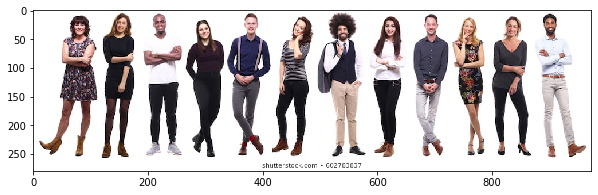

In [2]:
!wget https://image.shutterstock.com/image-photo/group-people-260nw-602783837.jpg test.jpg
!mv group-people-260nw-602783837.jpg test.jpg

img_path = './test.jpg'
img = cv2.imread(img_path)[:,:,::-1] # инвертируем каналы 
fig = plt.figure(figsize=(10,5))
plt.imshow(img);

###Prediction

In [0]:
img = cv2.imread(img_path)[:,:,::-1]
model = model.eval()
img_tensor = torch.from_numpy(img.astype('float32')).cuda().permute(2, 0, 1) / 255
predictions = model(img_tensor[None, :].cuda())

conf_thresh = 0.5
predictions = predictions[0]
boxes = predictions['boxes'][(predictions['labels'] == 1) & (predictions['scores'] > conf_thresh)] 
boxes_dict = {}
boxes_dict['boxes'] = boxes

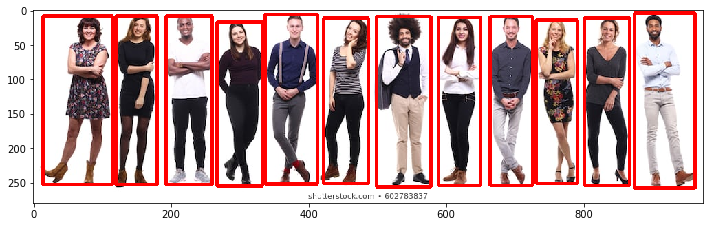

In [8]:
def plot_preds(numpy_img, predictions):
    boxes = predictions['boxes']
    boxes = boxes.cpu().detach().numpy() # detach from gradient graph
    for box in boxes:
        numpy_img = cv2.rectangle(numpy_img, (box[0], box[1]), (box[2], box[3]), 255, 3)
    return numpy_img.get()

boxes_img = plot_preds(img, boxes_dict)
plt.figure(figsize = (12, 7))
plt.imshow(boxes_img.astype('uint'));